# 4-1. 인구현황 데이터 분석

1. 지역별 총인구수 Top5
1-1. 지역별 총인구수 plot

In [1]:
import pandas as pd
df = pd.read_csv("../data/인구현황.csv")
df = df[df['행정기관'] != '전국']

df_first = df[['행정기관','총인구수']]
display(df_first.sort_values(by='총인구수',ascending=False).head(5))

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


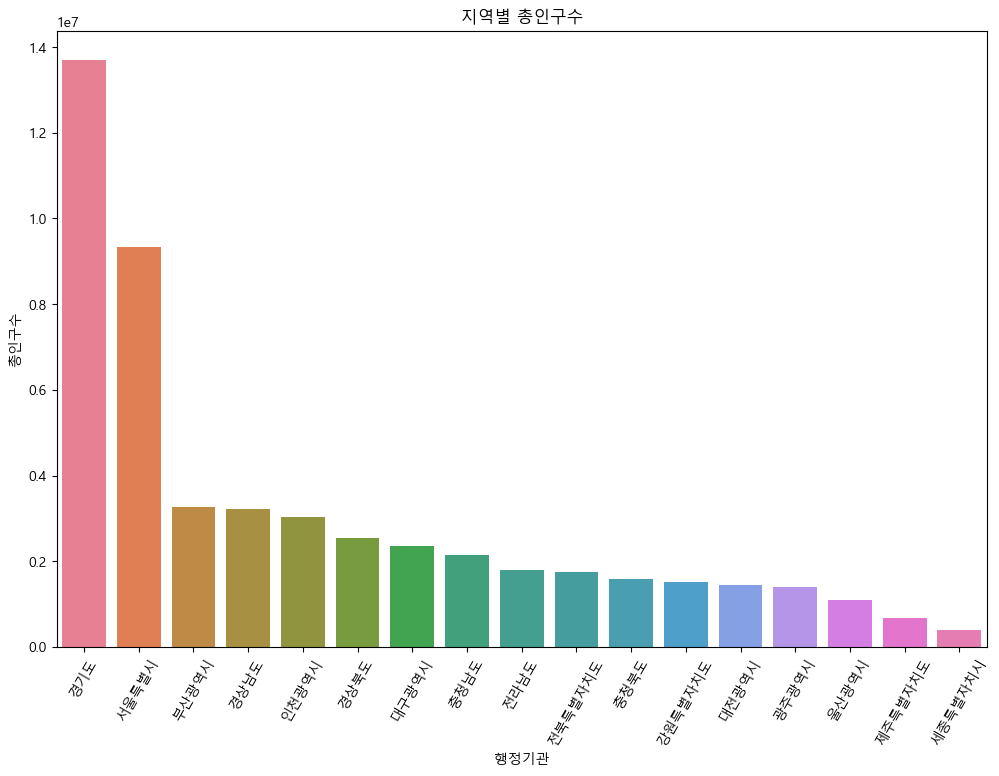

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

figure, axes = plt.subplots(1,1)
figure.set_size_inches(12,8)
plot = sns.barplot(
    data=df.sort_values(by='총인구수',ascending=False),
    x = '행정기관',
    y = '총인구수',
    ax = axes,
    hue = '행정기관'
)
plot.set_title("지역별 총인구수")
axes.tick_params(axis='x', rotation=60)

2. 세대당 인구수 높은 지역 Top5
2-1. 지역별 세대당 인구 Plot

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


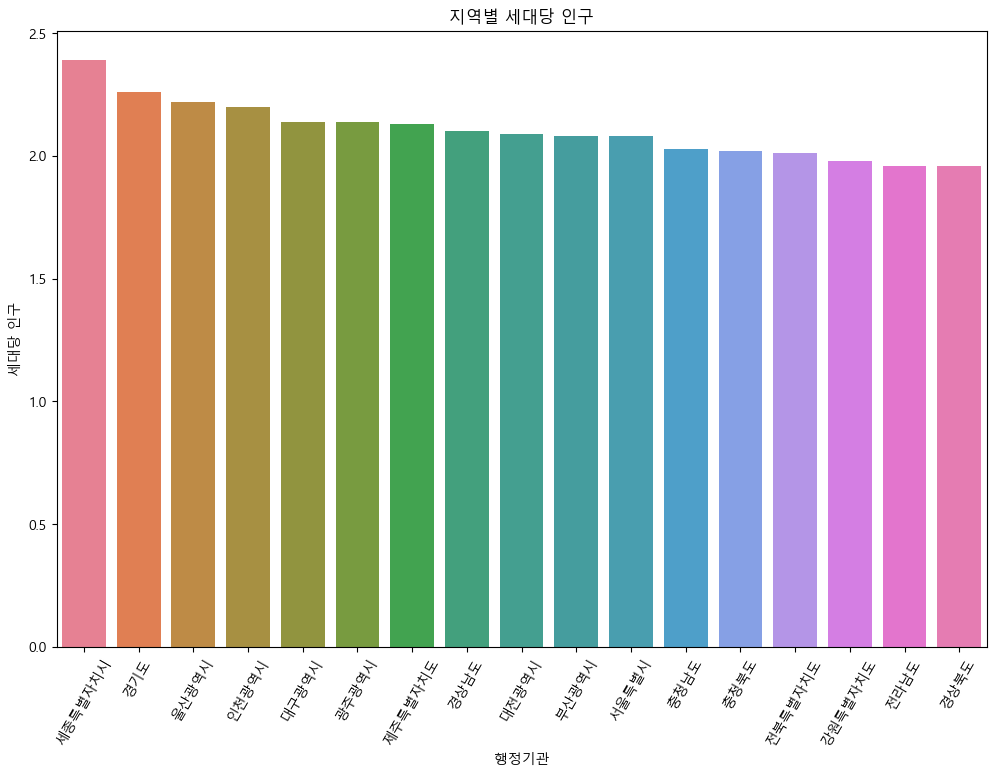

In [19]:
df_second = df[['행정기관','세대당 인구']]
display(df_second.sort_values(by='세대당 인구',ascending=False).head(5))

# 2번
figure, axes = plt.subplots(1,1)
figure.set_size_inches(12,8)
plot = sns.barplot(
    data=df.sort_values(by='세대당 인구',ascending=False),
    x = '행정기관',
    y = '세대당 인구',
    ax = axes,
    hue = '행정기관'
)
plot.set_title("지역별 세대당 인구")
axes.tick_params(axis='x', rotation=60)

3. 남녀 비율 분석
3-1. 남녀 비율 분석 Plot
* 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요.

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


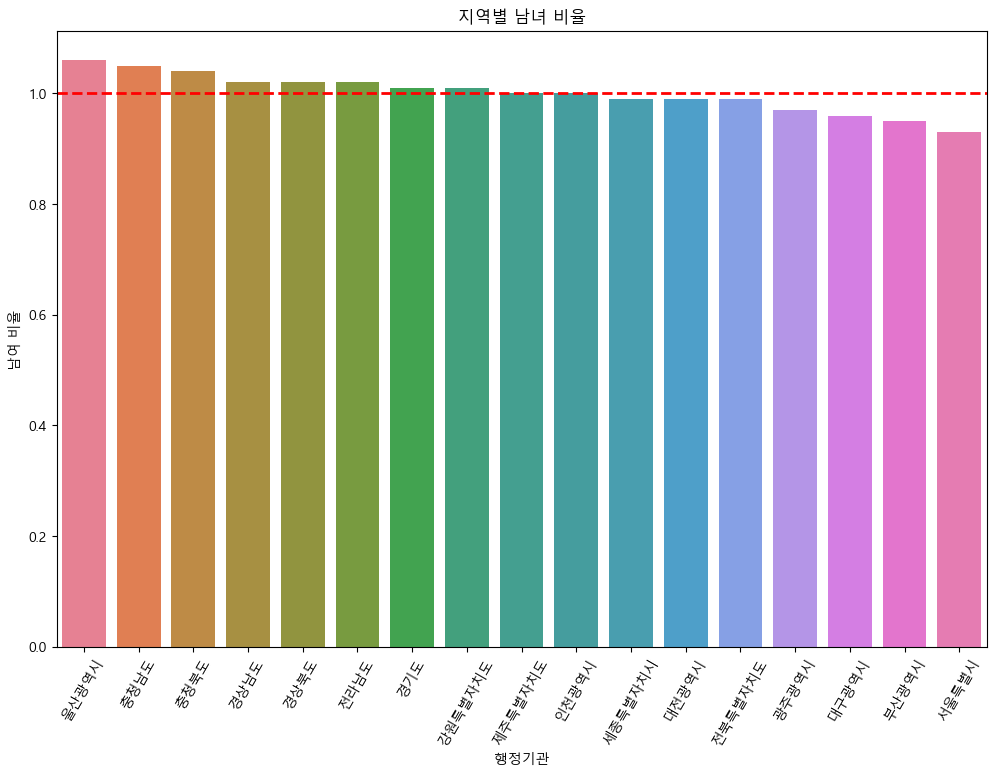

In [7]:
df_third = df[['행정기관','남여 비율']]
display(df_third.sort_values(by='남여 비율',ascending=False).reset_index(drop=True))

# 2번
figure, axes = plt.subplots(1,1)
figure.set_size_inches(12,8)
plot = sns.barplot(
    data=df.sort_values(by='남여 비율',ascending=False),
    x = '행정기관',
    y = '남여 비율',
    ax = axes,
    hue = '행정기관'
)

# 기준선 추가하기
axes.axhline(y=1, color='red', linestyle='--', linewidth=2)
plot.set_title("지역별 남녀 비율")
axes.tick_params(axis='x', rotation=60)



4. 남자초과 / 여자초과 분석

In [39]:
df_four = df[['행정기관','남여 비율']]
df_four['남초여초'] = df_four['남여 비율'].map(
    lambda x : '남초' if x>1 else ('동일' if x == 1 else '여초')
    )
display(df_four)

C:\Users\user\AppData\Local\Temp\ipykernel_6292\2444344422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_four['남초여초'] = df_four['남여 비율'].map(


,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [28]:
df.head(2)

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95


5. 세대당 인구 평균보다 높은 지역
5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot )
         지역별 세대수 Plot ( seaborn의 barplot )

In [35]:
df_five = df[['행정기관','세대당 인구']]
five_mean = round(df_five['세대당 인구'].mean(),2)
display(df_five[df['세대당 인구']>five_mean].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True))

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


Text(0.5, 1.0, '남초 vs 여초 지역 개수')

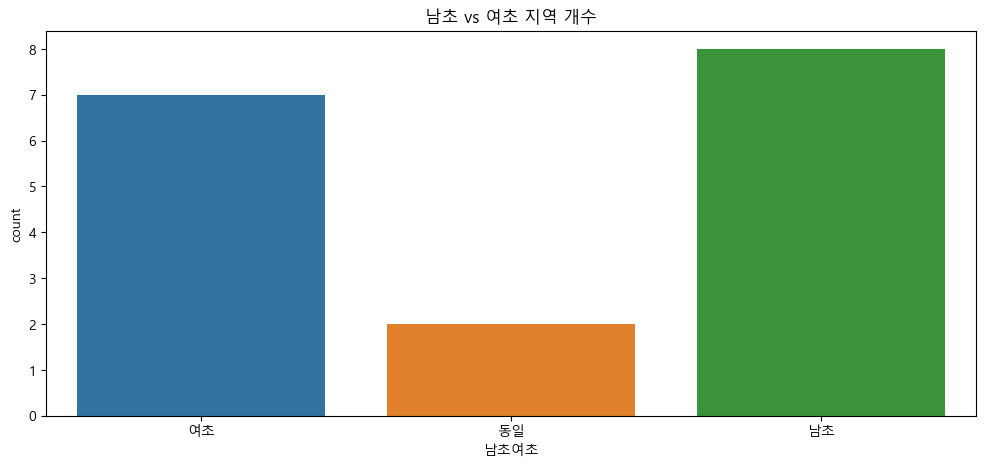

In [44]:
df_five_one = df.copy()
df_five_one['남초여초'] = df_five_one['남여 비율'].map(
    lambda x : '남초' if x>1 else ('동일' if x == 1 else '여초')
    )

figure, axes = plt.subplots(1,1)
figure.set_size_inches(12,5)
plot = sns.countplot(
    data=df_five_one,
    x = '남초여초',
    ax = axes,
    hue = '남초여초'
)
plot.set_title("남초 vs 여초 지역 개수")

Text(0.5, 1.0, '지역별 세대수')

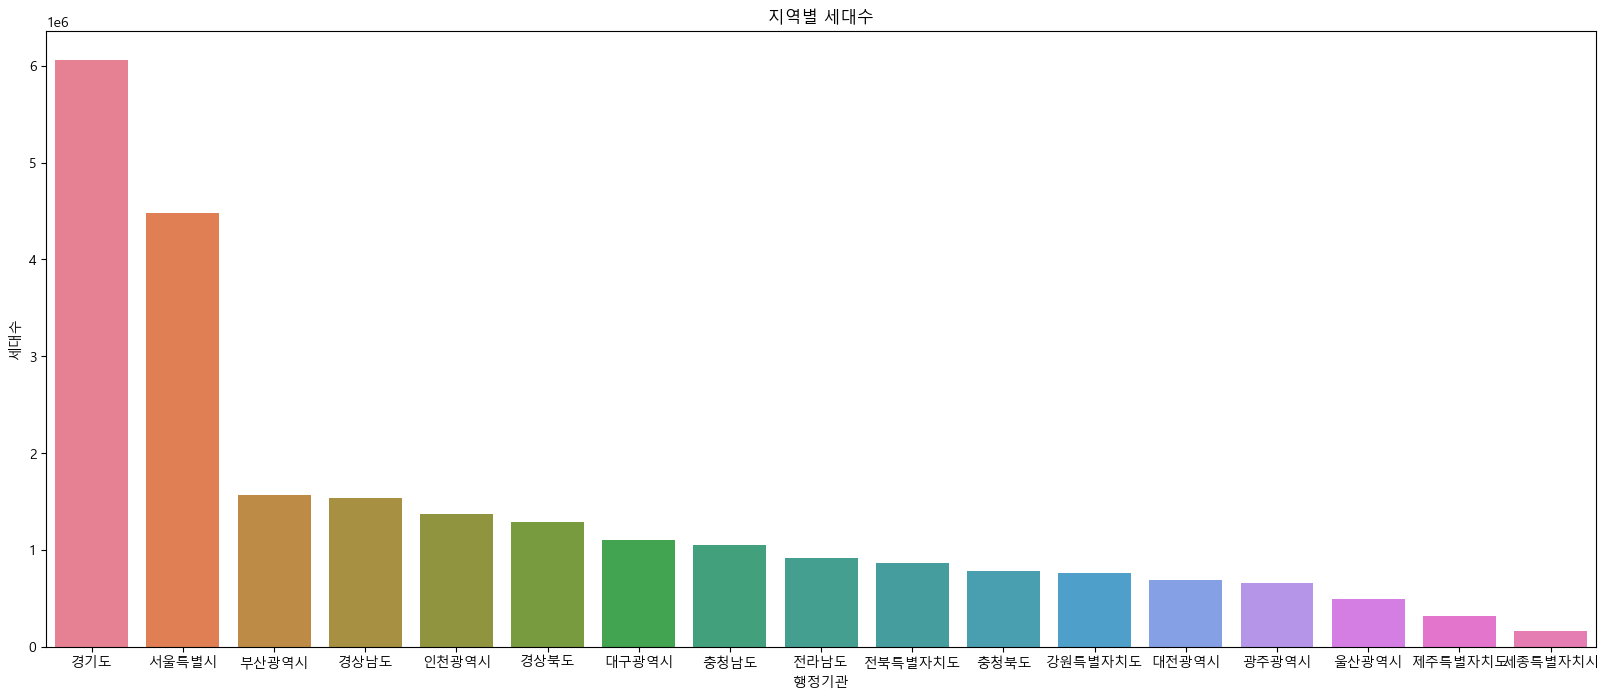

In [47]:
figure, axes = plt.subplots(1,1)
figure.set_size_inches(20,8)
plot = sns.barplot(
    data=df.sort_values(by='세대수',ascending=False),
    x = '행정기관',
    y = '세대수',
    ax = axes,
    hue = '행정기관'
)
plot.set_title("지역별 세대수")

6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )

In [2]:
df.head(2)

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95


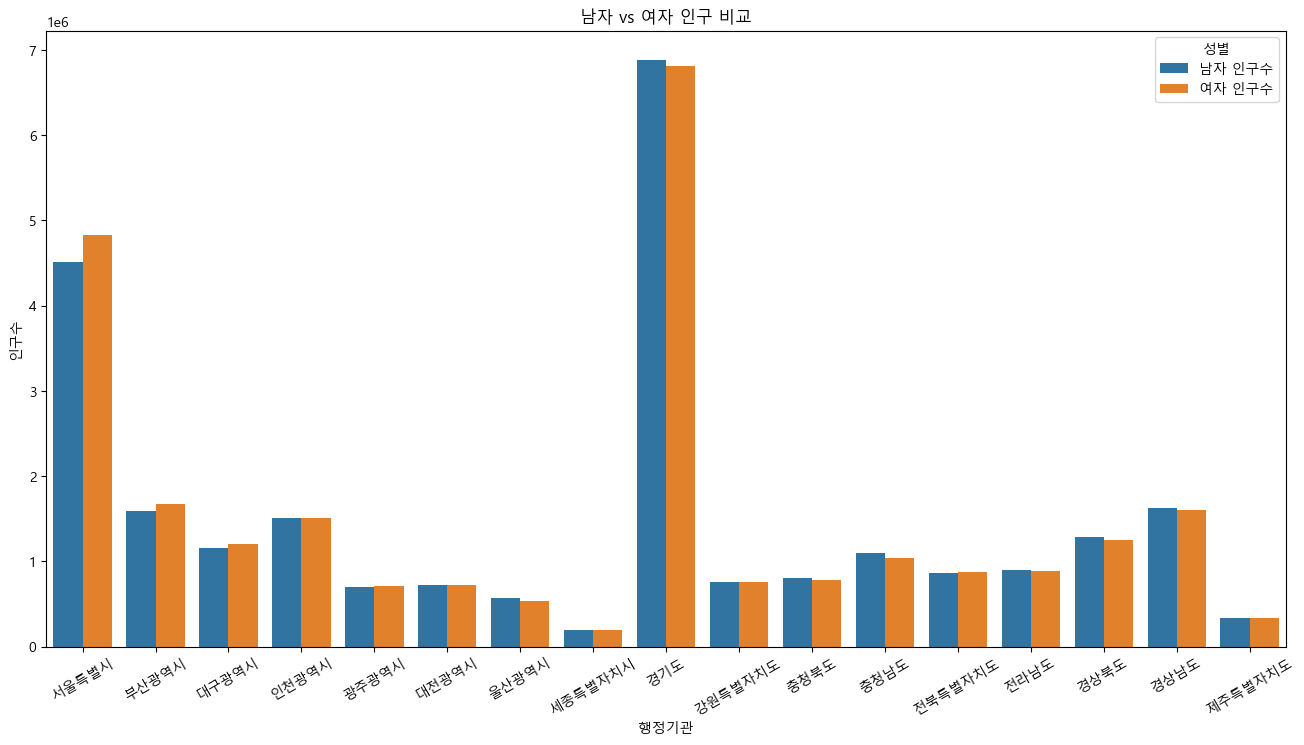

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_six = df[['행정기관','남자 인구수','여자 인구수']].copy()
df_six = df_six.melt(
    id_vars = '행정기관',
    value_vars= ['남자 인구수','여자 인구수'],
    var_name = '성별',
    value_name='인구수'
)

figure, axes = plt.subplots(1,1)
figure.set_size_inches(16,8)

sns.barplot(
    data=df_six,
    x='행정기관',
    y='인구수',
    hue='성별',
    ax=axes
)

axes.set_title('남자 vs 여자 인구 비교')
axes.tick_params(axis='x', rotation=30)